# Apple iOS App Data Exploration 

## Data

Data was extracted from the iTunes Search API in July 2017. This dataset contains information of over 7000 Apple iOS mobile applications. Data was obtained from [kaggle](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

This study assumes it is representative of the iOS App population. The dataset consists of two tables, AppleStore and appleStore_description. 

The AppleStore file contains App ID, App name, size, currency, price, user rating counts for all versions, user rating counts for the current version, average user rating for all versions, average user rating for the current version, latest version code, content rating, primary genre, number of supporting devices, number of screenshots showed for display, number of supported languages, and Vpp device based licensing enabled. The second table provides detailed description for the Apps included in the first table.

In [2]:
#Data exploration
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

t1 = pd.read_csv("AppleStore.csv")
t2 = pd.read_csv("appleStore_description.csv")

app = pd.DataFrame(t1)
app.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


Summary statistics for numerical variables are presented below. As we can see, most Apps are free or cheap with \$1.99 at the 75th percentile. However, an educational App LAMP Words For Life is priced at \$299.99. The average total rating count is 12,893 with a large standard deviation of 75,734, the maximum total rating count is 2,974,676. In terms of usring rating, average user rating for all versions is higher than user rating for the current version, 3.53 vs. 3.25 on a 0-5 scale. On average, these Apps can support 5 languages, however, the maximum reaches to 75 languages! Curious to know, this app is the Google Photos. 

In [8]:
app.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [10]:
app[app['price']>299]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1479,1714,551215116,LAMP Words For Life,583263232,USD,299.99,41,0,4.0,0.0,1.5.5,4+,Education,24,5,1,1


In [9]:
app[app['lang.num']==75]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
3414,4130,962194608,Google Photos - unlimited photo and video storage,160215040,USD,0.0,88742,1145,5.0,5.0,2.17.0,4+,Photo & Video,37,5,75,1


Two categorical variables in the dataset are primary genre and content rating (ordinal). There are 23 genres with the majority in Games. There are four content ratings and mostly 4+. 

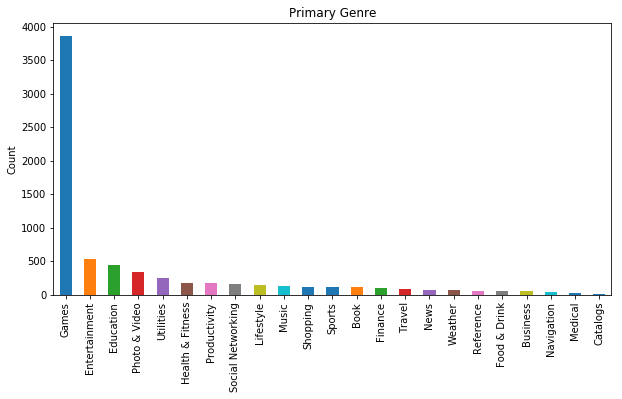

In [114]:
#Genre distribution
app['prime_genre'].value_counts().plot(kind='bar', figsize=(10,5))
plt.ylabel('Count')
plt.title('Primary Genre')
plt.show()

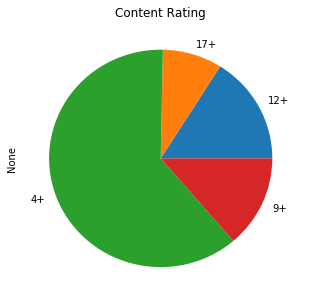

In [157]:
#Content rating 
plt.figure(figsize=(5,5))
app.groupby('cont_rating').size().plot(kind='pie')
plt.title('Content Rating')
plt.show()

As we can see from the descrptive statistics, price is very skewed. In order to see the details, we only display those less than \$15. 

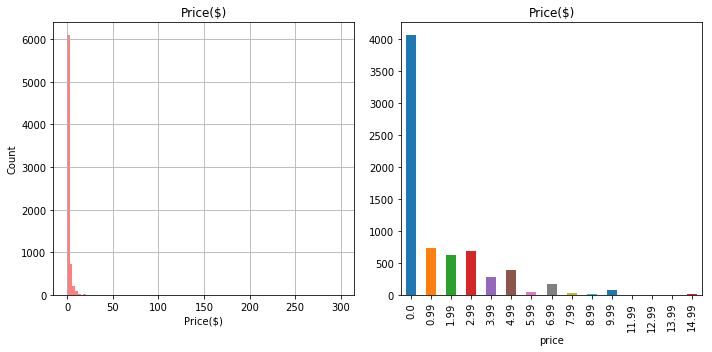

In [241]:
#Price 
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = app['price'].hist(bins=100, color='red', alpha=0.5)
ax.set(xlabel='Price($)', ylabel='Count')
plt.title('Price($)')

plt.subplot(1,2,2)
app[app['price']<15].groupby('price').size().plot(kind='bar')
plt.title('Price($)')
plt.tight_layout()
plt.show()

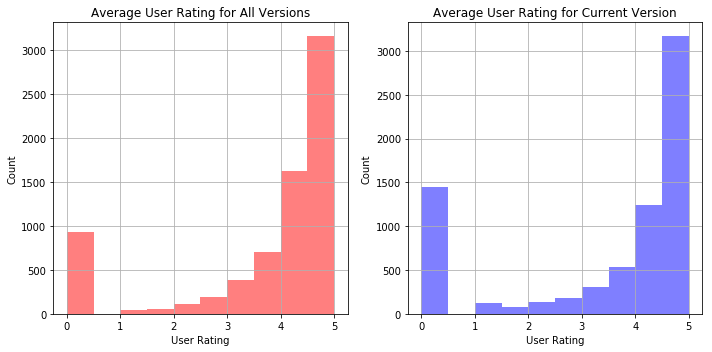

In [125]:
#User rating user_rating
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax = app['user_rating'].hist(bins=10, color='red', alpha=0.5)
ax.set(xlabel='User Rating', ylabel='Count')
plt.title('Average User Rating for All Versions')

#User rating user_rating_ver
plt.subplot(1,2,2)
ax = app['user_rating_ver'].hist(bins=10, color='blue', alpha=0.5)
ax.set(xlabel='User Rating', ylabel='Count')
plt.title('Average User Rating for Current Version')

plt.tight_layout()
plt.show()

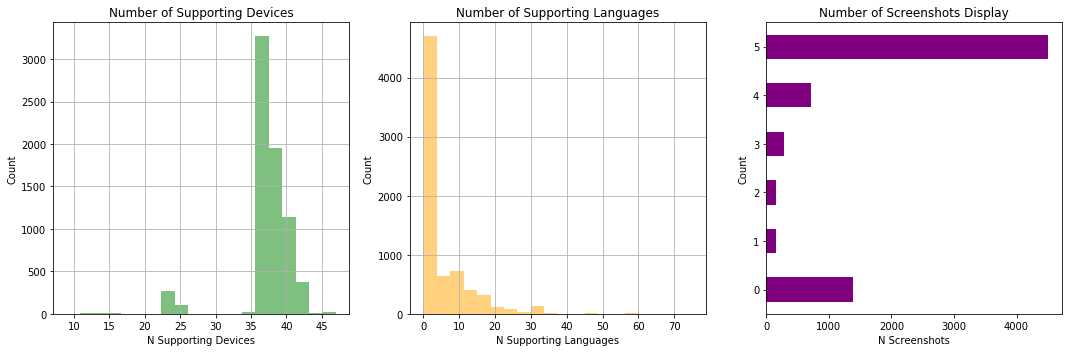

In [9]:
#Number of supporting devices
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax = app['sup_devices.num'].hist(bins=20, color='green', alpha=0.5)
ax.set(xlabel='N Supporting Devices', ylabel='Count')
plt.title('Number of Supporting Devices')

#Number of supported languages
plt.subplot(1,3,2)
ax = app['lang.num'].hist(bins=20, color='orange', alpha=0.5)
ax.set(xlabel='N Supporting Languages', ylabel='Count')
plt.title('Number of Supporting Languages')

#Number of screenshots showed for display 
plt.subplot(1,3,3)
app.groupby('ipadSc_urls.num').size().plot(kind='barh', color='purple')
plt.xlabel('N Screenshots')
plt.ylabel('Count')
plt.title('Number of Screenshots Display')

plt.tight_layout()
plt.show()

## Analytic Questions 
### Q1. What are the most popular iOS Apps in the Apple store? What are the their characteristics? 

In [12]:
#Top 100 popular Apps overall
top = app.sort_values('rating_count_tot', ascending=False).head(100)
top.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
16,17,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
519,591,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
1346,1561,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
707,810,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
755,863,429047995,Pinterest,74778624,USD,0.0,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1
4,5,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
1493,1731,553834731,Candy Crush Saga,222846976,USD,0.0,961794,2453,4.5,4.5,1.101.0,4+,Games,43,5,24,1
178,202,324684580,Spotify Music,132510720,USD,0.0,878563,8253,4.5,4.5,8.4.3,12+,Music,37,5,18,1
275,310,343200656,Angry Birds,175966208,USD,0.0,824451,107,4.5,3.0,7.4.0,4+,Games,38,0,10,1


In [16]:
top.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,100.000000,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,1356.690000,4.937498e+08,2.332309e+08,0.208900,4.606431e+05,7481.350000,4.260000,4.240000,37.500000,4.000000,12.000000,0.99
std,1651.545824,2.153645e+08,3.647365e+08,0.830098,4.253726e+05,23596.884201,0.519712,0.657052,3.295237,1.769552,11.006885,0.10
min,3.000000,2.819403e+08,8.573952e+06,0.000000,1.875290e+05,0.000000,2.500000,0.000000,12.000000,0.000000,1.000000,0.00
25%,187.500000,3.211847e+08,1.000200e+08,0.000000,2.574952e+05,215.750000,4.000000,4.000000,37.000000,4.000000,1.750000,1.00
50%,932.500000,4.381827e+08,1.306214e+08,0.000000,3.440075e+05,916.500000,4.500000,4.500000,37.000000,5.000000,10.000000,1.00
75%,1978.500000,5.860913e+08,1.769695e+08,0.000000,4.680940e+05,3518.250000,4.500000,4.500000,38.000000,5.000000,16.250000,1.00
max,10224.000000,1.153883e+09,1.944321e+09,6.990000,2.974676e+06,177050.000000,5.000000,5.000000,43.000000,5.000000,45.000000,1.00


We identified Top100 Apps based on total rating counts. For your information, the Top10 popular Apps are: Facebook, Instagram, Clash of Clans, Temple Run, Pandora, Pinterest, Bible, Candy Crush Saga, Spotify, and Angry Birds. How many of them are on your iPhone? 

Among these Top100 Apps, 60% of them are games, followed by social networking (7%), music (4%), entertainment (4%) and weather (3%). 

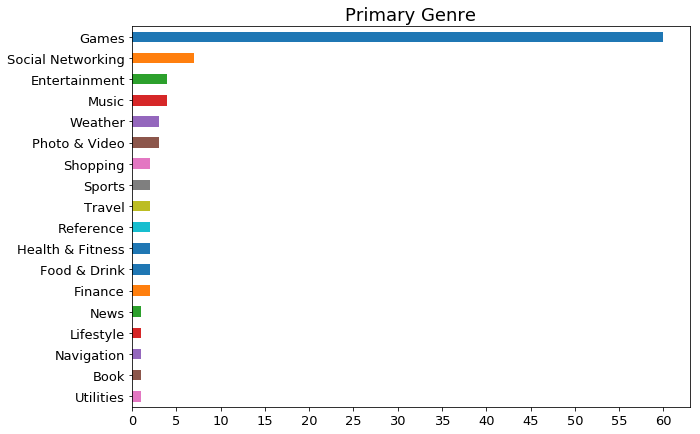

In [13]:
ax = top['prime_genre'].value_counts().plot(kind='barh', figsize=(10,7), fontsize=13)
ax.set_alpha(0.8)
ax.set_title ('Primary Genre', fontsize=18)
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])

ax.invert_yaxis()

plt.show()

In general, these Top100 Apps have relatively higher user ratings. On average, both all versions and the current version are rated above 4.2.  

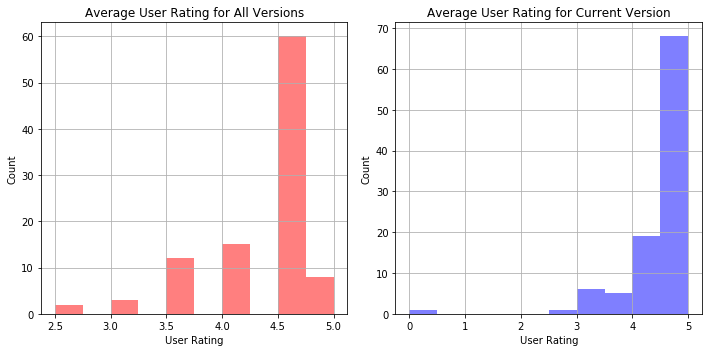

In [14]:

#User rating user_rating
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax = top['user_rating'].hist(bins=10, color='red', alpha=0.5)
ax.set(xlabel='User Rating', ylabel='Count')
plt.title('Average User Rating for All Versions')

#User rating user_rating_ver
plt.subplot(1,2,2)
ax = top['user_rating_ver'].hist(bins=10, color='blue', alpha=0.5)
ax.set(xlabel='User Rating', ylabel='Count')
plt.title('Average User Rating for Current Version')

plt.tight_layout()
plt.show()

Among these Top100 Apps, the majority supports over 35 devices, less than five languages, and has five screenshots display.

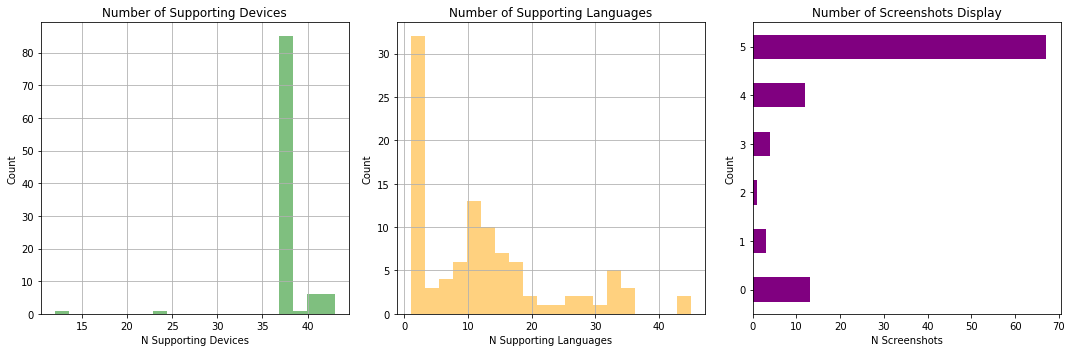

In [11]:
#Number of supporting devices
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax = top['sup_devices.num'].hist(bins=20, color='green', alpha=0.5)
ax.set(xlabel='N Supporting Devices', ylabel='Count')
plt.title('Number of Supporting Devices')

#Number of supported languages
plt.subplot(1,3,2)
ax = top['lang.num'].hist(bins=20, color='orange', alpha=0.5)
ax.set(xlabel='N Supporting Languages', ylabel='Count')
plt.title('Number of Supporting Languages')

#Number of screenshots showed for display 
plt.subplot(1,3,3)
top.groupby('ipadSc_urls.num').size().plot(kind='barh', color='purple')
plt.xlabel('N Screenshots')
plt.ylabel('Count')
plt.title('Number of Screenshots Display')

plt.tight_layout()
plt.show()

### Q2. What features of an App correlate to user's satisfaction? 

In [235]:
app.corr()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,rating_diff
Unnamed: 0,1.000000,0.910714,0.041277,-0.074326,-0.168640,-0.064717,-0.204867,-0.127580,0.024648,0.014589,-0.148487,0.000501,0.069605
id,0.910714,1.000000,0.077486,-0.075247,-0.201976,-0.072784,-0.185178,-0.109849,0.033605,0.052082,-0.128932,0.017743,0.071511
size_bytes,0.041277,0.077486,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614,-0.150418,0.047916
price,-0.074326,-0.075247,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713,-0.029942,-0.021879
rating_count_tot,-0.168640,-0.201976,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675,-0.000982,0.029626
rating_count_ver,-0.064717,-0.072784,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287,0.006460,0.031681
user_rating,-0.204867,-0.185178,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976,0.069816,-0.101836
user_rating_ver,-0.127580,-0.109849,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580,0.050094,0.550888
sup_devices.num,0.024648,0.033605,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681,-0.037109,0.026266
ipadSc_urls.num,0.014589,0.052082,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378,0.071901,0.083062


We explored this quesiton by generating correlation matrix among all variables. As we can see above, both number of screenshots display and number of supported languages have relatively higher correlation with user ratings (similar for all version and current version), 0.27-0.28 and 0.17-0.18, respectively. 

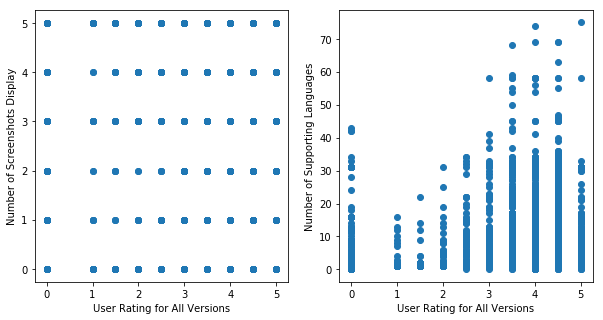

In [28]:
#Hobson: I didn't expect the plots like this. Anything wrong? 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(app['user_rating'], app['ipadSc_urls.num'])
plt.xlabel('User Rating for All Versions')
plt.ylabel('Number of Screenshots Display')


plt.subplot(1,2,2)
plt.scatter(app['user_rating'], app['lang.num'])
plt.xlabel('User Rating for All Versions')
plt.ylabel('Number of Supporting Languages')
plt.show()

### Q3. How consistent are user ratings? Have the Apps been improved over time? 

This question was examined through the correlation and difference between user ratings for all versions and the current version. As we can see, the correlation between all version rating and current version rating is 0.77. Therefore, user ratings are fairly consistent.  

In [27]:
np.corrcoef(app['user_rating'], app['user_rating_ver'])

array([[1.        , 0.77413985],
       [0.77413985, 1.        ]])

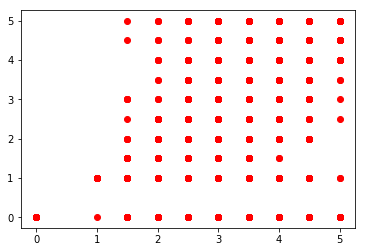

In [26]:
#Hobson: I didn't expect the plot like this. Anything wrong? 
plt.scatter(app['user_rating'], app['user_rating_ver'], color='red')
plt.show()

In general, the Apps are not improved over time, as shown by the mean difference rating of -0.27 between current version and all versions. However, if we look at the Top100 Apps, the mean difference shrinks to -0.02, most of them are rated very similar over time. 

In [31]:
#For all Apps 
app['rating_diff'] = app['user_rating_ver'] - app['user_rating']
app['rating_diff'].describe()

count    7197.000000
mean       -0.273378
std         1.151339
min        -5.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.500000
Name: rating_diff, dtype: float64

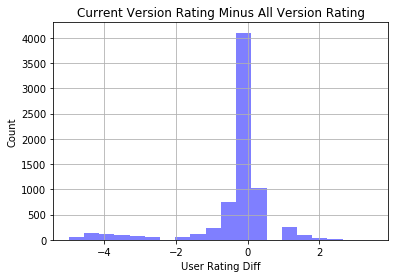

In [30]:
ax = app['rating_diff'].hist(bins=20, color='blue', alpha=0.5)
ax.set(xlabel='User Rating Diff', ylabel='Count')
plt.title('Current Version Rating Minus All Version Rating')
plt.show()

In [33]:
#For Top100 Apps 
top['rating_diff'] = top['user_rating_ver'] - top['user_rating']
top['rating_diff'].describe()

count    100.000000
mean      -0.020000
std        0.531436
min       -2.500000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.500000
Name: rating_diff, dtype: float64

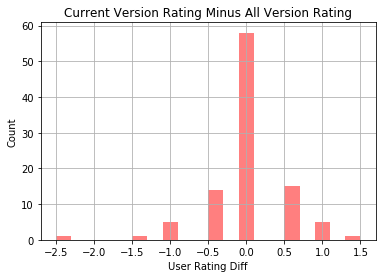

In [34]:
ax = top['rating_diff'].hist(bins=20, color='red', alpha=0.5)
ax.set(xlabel='User Rating Diff', ylabel='Count')
plt.title('Current Version Rating Minus All Version Rating')
plt.show()

### Future Research

For future research, we can build a model to predict user satisfaction using supervised learning technique, e.g., regression. The dependent variable would be user_rating and the independent variables could be number of screenshots display and number of supported languages. 